# Import Library

In [2]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [5]:
wordnetlemmatizer = WordNetLemmatizer()

# read files

In [7]:
titles = [line.rstrip() for line in open('all_book_titles.txt')]
stopwords = set(w.rstrip() for w in open('stopwords.txt'))
stopwords = stopwords.union({'introduction', 'edition', 'series', 'application', 'approach', 'card', 'access', 'package', 'plus', 'etext','brief','vol', 'fundamental', 'guide', 'essential', 'printed','third', 'second', 'fourth'})

In [8]:
titles

['Philosophy of Sex and Love A Reader',
 'Readings in Judaism, Christianity, and Islam',
 'Microprocessors Principles and Applications',
 'Bernhard Edouard Fernow: Story of North American Forestry',
 'Encyclopedia of Buddhism',
 'Motorola Microprocessor Family: 68000, 68008, 68010, 68020, 68030, and 68040, Programming and Interfacing with Applications',
 'American Anthem: Student Edition Modern Era 2007',
 'How to Read Literature Like a Professor A Lively and Entertaining Guide to Reading Between the Lines',
 'Men Are from Mars, Women Are from Venus Secrets of Great Sex, Improving Communication, Lasting Intimacy and Fulfillment, Giving and Receiving Love, Secrets of Passion, Understanding Martian',
 'Religious Traditions of the World A Journey Through Africa, Mesoamerica, North America, Judaism, Christianity, Islam, Hinduism, Buddhism, China, an',
 "World's Wisdom Sacred Texts of the World's Religions",
 "Illustrated World's Religions A Guide to Our Wisdom Traditions",
 'Soul of Sex Cu

In [10]:
len(titles)

2373

In [11]:
stopwords

{'a',
 'about',
 'above',
 'access',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'application',
 'approach',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'brief',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'card',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'edition',
 'either',
 'end',
 'ended',
 'ending',
 'ends',
 'enough',
 'essential',
 'et

# preprocessing

In [16]:
def tokenizing(title):
    #소문자로 바꿔준다.
    title = title.lower()    
    tokens = nltk.tokenize.word_tokenize(title)    
    
    #유용하지 않은 단어 버리기
    tokens = [t for t in tokens if len(t)>2]
    tokens = [wordnetlemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    
    # 7edition 처럼 숫자가 제목에 포함된 경우 그 부분 제거
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [17]:
tokenizing(titles[10])

['world', 'wisdom', 'sacred', 'text', 'world', 'religion']

In [18]:
#text에 나타나는 단어들을 저장
word_index = {}
current_index = 0

all_tokens = []
all_titles = []
words = []

In [19]:
for title in titles:
    #ASCII로 인한 오류 처리
    try:
        all_titles.append(title)
        tokens = tokenizing(title)
        all_tokens.append(tokens)
        for t in tokens:
            if t not in word_index:
                word_index[t] = current_index
                current_index+=1
                words.append(t)
    except:
        pass

In [20]:
#unsupervised learning이므로 label을 따로 사용하지 않는다.
def vectorizing(tokens):
    x = np.zeros(len(word_index))
    for t in tokens:
        i = word_index[t]
        x[i] = 1
    return x

In [25]:
n = len(all_tokens)
d = len(word_index)
X = np.zeros((d,n))
i = 0

In [27]:
print(d, n)

2071 2373


In [26]:
for tokens in all_tokens:
    #원래 row vector을 column vector로 바꿔서 대입
    #각 column에 값들이 들어간다. 
    #각 행은 Term, 열은 문서
    #X의 row가 2071, tokens_to_vector의 길이가 2071이므로
    X[: , i] = vectorizing(tokens)
    i+=1

# dimensionality reduction

In [29]:
svd = TruncatedSVD()

#svd를 이용하여 차원 축소
#2373차원을 2차원으로 번경
#컴퓨터 화면은 2차원이므로 보기 쉽게 만들기 위함
z = svd.fit_transform(X)
print("X:",X.shape, "Z:",z.shape)

X: (2071, 2373) Z: (2071, 2)


In [32]:
z

array([[ 0.08421543,  0.09226647],
       [ 0.13769433,  0.20936576],
       [ 0.02553224,  0.00887179],
       ...,
       [ 0.01096467, -0.00075315],
       [ 0.01096467, -0.00075315],
       [ 0.01096467, -0.00075315]])

# unsupervised learning

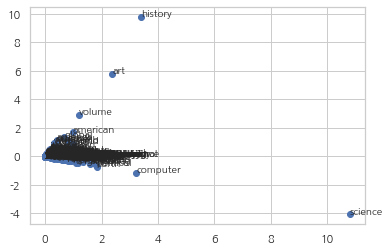

In [30]:
plt.scatter(z[:,0], z[:,1])
for i in range(d):
    #s는 점 위에 나올 문자
    #xy는 각각 x,y좌표
    plt.annotate(s = words[i], xy=(z[i,0],z[i,1]))
    #비슷한 단어는 비슷한 좌표를 가지게 됨